

# Project Cifar 10

## Downloading the Cifar 10 Dataset

In [1]:
import cifar10
import matplotlib.pyplot as plt

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


### Converting the training image data to rows of linear array:

In [7]:
xtrain=images_train.reshape(50000,32*32*3)
xtrain.shape


(50000, 3072)

### Converting the training class array with numeric data to names of classes:

In [8]:
cls_train[:30]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3,
       6, 6, 2, 6, 3, 5, 4, 0])

In [9]:
ytrain=[class_names[w] for w in cls_train]
ytrain

['frog',
 'truck',
 'truck',
 'deer',
 'automobile',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'deer',
 'horse',
 'horse',
 'bird',
 'truck',
 'truck',
 'truck',
 'cat',
 'bird',
 'frog',
 'deer',
 'cat',
 'frog',
 'frog',
 'bird',
 'frog',
 'cat',
 'dog',
 'deer',
 'airplane',
 'airplane',
 'truck',
 'automobile',
 'cat',
 'deer',
 'airplane',
 'cat',
 'horse',
 'cat',
 'cat',
 'dog',
 'bird',
 'bird',
 'horse',
 'automobile',
 'automobile',
 'automobile',
 'bird',
 'bird',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'bird',
 'bird',
 'dog',
 'bird',
 'deer',
 'cat',
 'automobile',
 'automobile',
 'ship',
 'bird',
 'automobile',
 'automobile',
 'deer',
 'truck',
 'horse',
 'ship',
 'dog',
 'truck',
 'frog',
 'horse',
 'cat',
 'automobile',
 'truck',
 'airplane',
 'cat',
 'automobile',
 'cat',
 'dog',
 'deer',
 'dog',
 'horse',
 'horse',
 'deer',
 'horse',
 'truck',
 'deer',
 'bird',
 'cat',
 'ship',
 'airplane',
 'automobile',
 'frog',
 'automobile',
 'automobile',
 

### Converting the testing data to rows of linear list:

In [10]:
xtest=images_test.reshape(10000,32*32*3)

### Converting the testing class array with numeric data to names of classes:


In [11]:
ytest=[class_names[w] for w in cls_test]
ytest

['cat',
 'ship',
 'ship',
 'airplane',
 'frog',
 'frog',
 'automobile',
 'frog',
 'cat',
 'automobile',
 'airplane',
 'truck',
 'dog',
 'horse',
 'truck',
 'ship',
 'dog',
 'horse',
 'ship',
 'frog',
 'horse',
 'airplane',
 'deer',
 'truck',
 'dog',
 'bird',
 'deer',
 'airplane',
 'truck',
 'frog',
 'frog',
 'dog',
 'deer',
 'dog',
 'truck',
 'bird',
 'deer',
 'automobile',
 'truck',
 'dog',
 'deer',
 'frog',
 'dog',
 'frog',
 'airplane',
 'truck',
 'cat',
 'truck',
 'horse',
 'frog',
 'truck',
 'ship',
 'airplane',
 'cat',
 'ship',
 'ship',
 'horse',
 'horse',
 'deer',
 'frog',
 'horse',
 'cat',
 'frog',
 'cat',
 'frog',
 'bird',
 'automobile',
 'bird',
 'cat',
 'horse',
 'bird',
 'frog',
 'ship',
 'ship',
 'airplane',
 'bird',
 'truck',
 'cat',
 'cat',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'horse',
 'bird',
 'dog',
 'bird',
 'horse',
 'ship',
 'truck',
 'airplane',
 'cat',
 'ship',
 'frog',
 'deer',
 'frog',
 'frog',
 'airplane',
 'airplane',
 'horse',
 'deer',
 'dog',
 'f

## Applying PCA on the training data to find the optimal number of features:

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


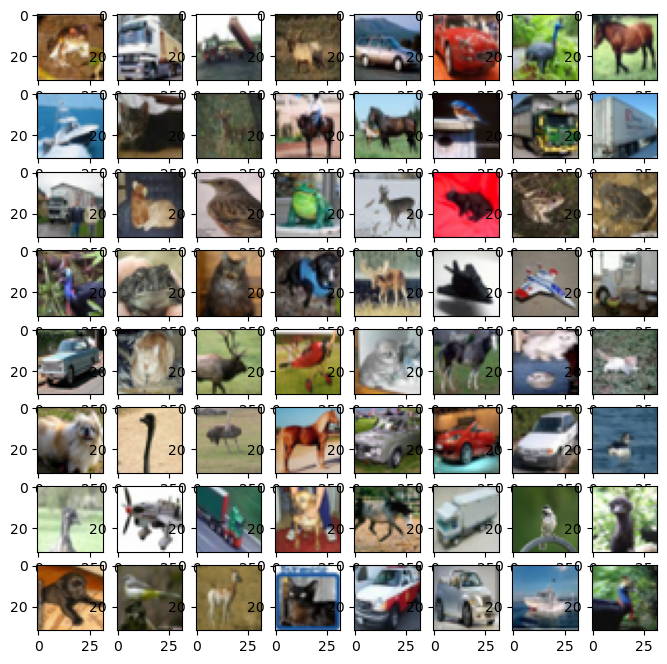

In [13]:
#plotting the pictures from the training data:

fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(images_train[i])
    

In [14]:
pca=PCA()
#transforming the xtrain data as per PCA
x_transform=pca.fit_transform(xtrain)
x_transform.shape

(50000, 3072)

In [15]:
#Finding the optimal number of features to retain 99 percent of the informatin from the given dataset:
k=0
total=sum(pca.explained_variance_)
current_covariance_percent=0
while current_covariance_percent<0.99:
    current_covariance_percent+=pca.explained_variance_[k]/total
    k+=1
k

658

In [16]:
k

658

In [17]:
#transforming the data as per optimal number of features obtained:
pca1=PCA(n_components=k)
xtransform=pca1.fit_transform(xtrain)
xtransform.shape


(50000, 658)

In [18]:
#converting testing data as per optimal features:
xtest=pca1.transform(xtest)

In [19]:
xtest.shape

(10000, 658)

## Trying Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [21]:
#fitting the logistic regression:
lr.fit(xtransform,ytrain)



/Users/rishismac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
#the score obtained from logistic regression is not that satisfactory:
lr.score(xtest,ytest)

0.4038

## Trying Random Forest

In [23]:
#checking with Random Forest for imporvements in the score:

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()



In [24]:
rfc.fit(xtransform,ytrain)

RandomForestClassifier()

In [25]:
rfc.score(xtest,ytest)

0.3936

In [26]:
#Applied grid search to search for better hyper parameters of random forest model but there was still no significant improvement:

#from sklearn.model_selection import GridSearchCV
#grid={'max_depth':[5,6,7,8,9,10,11,12]}
#abc=GridSearchCV(rfc,grid)
#abc.fit(xtransform,ytrain)


In [27]:
#abc.best_estimator_

In [28]:
#abc.cv_results_

In [29]:
#from sklearn.ensemble import RandomForestClassifier
#rfc=RandomForestClassifier(max_depth=15)
#rfc.fit(xtransform,ytrain)
#rfc.score(xtest,ytest)

#got only about 39 percent accuracy


## Trying the KNN Classifier:

In [30]:
#Applied grid search oon KNN as well but dint get any significant improvement:


#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV
#knclf=KNeighborsClassifier()
#grid={'n_neighbors':[3,5,7,9,11]}
#abc=GridSearchCV(knclf,grid)
#abc.fit(xtransform,ytrain)
#abc.best_estimator_



In [31]:
#abc.cv_results_

## Trying Support Vector Machine

In [32]:
from sklearn.svm import SVC




In [33]:
#Creating Support Vector Classifier:
#This may take upto several minutes due to computational complications:
svc=SVC()
svc.fit(xtransform,ytrain)

SVC()

In [34]:
#The score obtained is still not satisfactory but fairly better as compared to other classifiers
svc.score(xtest,ytest)

0.5439

In [37]:
y_pred=svc.predict(xtest)
y_pred

array(['cat', 'ship', 'ship', ..., 'dog', 'dog', 'horse'], dtype='<U10')

## Exporting the predictions to CSV File:

In [67]:
import pandas as pd
df=pd.DataFrame(y_pred)
df.to_csv('Cifar Saptarshi_Ghosh.csv',index=False,header=None)

### Tried to use Grid Search on SVC as well but it was highly time consuming

In [ ]:
#svc_l=SVC(kernel='linear')
#svc_l.fit(xtransform,ytrain)
#svc_l.score(xtest,ytest)

#got only around 40 percent accuracy

In [ ]:
#from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV

#svc=SVC()
#grid={'C':[1e1,1e2,1e3,1e4,1e5],
     #'gamma':[1e1,1,1e-1,1e-2,1e-3]}
#abc=GridSearchCV(svc,grid)
#abc.fit(xtransform,ytrain)


In [ ]:
#abc.best_estimator_

In [ ]:
#abc.cv_result_

## Conclusion:
- Seeing the complexity of the images the best that we can get from clasifiers mentioned above is limited
- In order to further improve the score and efficiency Deep Learning could be a very furitful solution. In the models - I have tested using Deep Learing i have also got scores as high as 86 percent.
- But since it was specially mentioned to use only what we have learned upto now it is beyond the current scope.



In [ ]:
def divide(a,b):
    return a/b
print(divide(3,5))
